# Abstract
Digit recognition plays crucial role in various aspects such as document processing, security systems or historical data analysis. This project aims to explore effective methods in handwritten digit analysis using K-Nearest Neighbors algorithm (KNN) and other machine learning techniques. In this study a MNIST dataset consisting of a large collection of handwritten digits was used as a primary data source. After preprocessing, and normalization, we applied PCA to reduce the number of dimensions. We implemented a KNN classifier to recognize digits and carried out performance analysis by use of a confusion Matrix. Subsequently, different extensions of handwritten digit analysis such as KD-Trees and Convolutional Neuronal Network (CNN) were implemented and evaluated in context of recognition of diverse patterns of handwritten digits.

# Table of contents
- [Introduction](#Introduction)
- [Materials](#Materials)
	- [MNIST dataset](#MNIST-dataset)
    - [Used libraries](#Used-libraries)
- [Methods](#Methods)
    - [Z-Transform](#Z-Transform)
    - [Principal Component Analysis (PCA)](#Principal-Component-Analysis-(PCA))
    - [K-Nearest Neighbors (KNN)](#K-Nearest-Neighbors-(KNN))
    - [KD-Tree](#KD-Tree)
    - [KNeighborsClassifier](#KNeighborsClassifier)
    - [Confusion matrix](#Confusion-matrix)  
    - [CNN](#CNN)
- [Results](#Results)
    - [Runtime of KNN, KD-Tree and KNeighborsClassifier](#Runtime-of-KNN,-KD-Tree-and-KNeighborsClassifier)
    - [Accuracy of KNN, KD-Tree and KNeighborsClassifier](#Accuracy-of-KNN,-KD-Tree-and-KNeighborsClassifier)
    - [Principal components and their explained variance](#Principal-components-and-their-explained-variance)
    - [Accuracy and execution time for differing numbers of Principal components](#Accuracy-and-execution-time-for-differing-numbers-of-Principal-components])
    - [Comparison: our KNN algorithm and Convolutional Neural Network (CNN)](#Comparison:-our-KNN-algorithm-and-Convolutional-Neural-Network-(CNN))
    - [Error analysis](#Error-analysis)
- [Discussion](#Discussion)
    - [Runtime](#Runtime)
    - [Accuracies](#Accuracies)
    - [Best k-value](#Best-k-value)
    - [PCA, accuracy and execution time](#PCA,-accuracy-and-execution-time)
    - [CNN vs. KNN](#CNN-vs.-KNN)
    - [Error analysis of our KNN algorithm](#Error-analysis-of-our-KNN-algorithm)
- [Conclusion](#Conclusion)
- [Appendix](#Appendix)

# Introduction
This project aims to recognize and match handwritten digits using a self-implemented algorithm, driven by the growing importance of automatic digit recognition. The goal is to speed up various processes, such as personnel data recognition and exam evaluation, by accurately and efficiently recognizing handwritten digits. KNN, a simple yet powerful algorithm, has been widely used in various fields. However, its performance can be affected by high dimensionality of the data (Trevor et al., 2009), which can be addressed using the dimensionality reduction technique (PCA). PCA is used to reduce the dimensionality of the large MNIST dataset while extracting important features, making our algorithm more efficient (Bro and Smilde, 2014). 
Our project starts with the application of PCA to our 60,000 training images and then implementing KNN. Finally, we analyze the accuracy of our algorithm with respect to many different aspects: the accuracy of our algorithm and how it changes for varying parameters, the execution time for the accuracy compared to KNN algorithm using pre-installed libraries. 
Subsequently, we used Convolutional Neuronal Network (CNN) for performance comparison in context of recognition of handwritten digits.

# Materials
## MNIST dataset
The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of 60,000 handwritten digit images for training and 10,000 images for testing, with each image being a grayscale 28x28 pixel representation with pixel values between 1 and 255 (LeCun et al., 2010). 
## Used libraries
### Pandas
**Version 2.0.2**

We used the Pandas library to import our MNIST dataset and to create so-called "DataFrames". It is similar to a table, but each column can contain a different data type. In our case, we created a dataframe where the euclidean distances between a test image and all training images were sorted in ascending order. This then allowed us to display the labels of the k-nearest-neighbors. Also the tables for the accuracy calculation were first created as a dataframe and then converted into a csv file (GeeksForGeeks, 2023).
### NumPy
**Version 1.24.3**

NumPy is used for a variety of mathematical operations, for example, root extraction in the calculation of euclidean distance. NumPy can be extended with SciPy so that even more mathematical operations are possible. One operation we used from SciPy is KD-Tree, which allows us to compare our accuracy with the ready to use implementation of SciPy (Bernd Klein).

### Matplotlib
**Version 3.7.1**

Matplotlib is a Python library for visualizing data in the form of various types of graphs. Examples are: Line charts, heat maps and bar charts (The-Matplotlib-development-team). In our code, we created the confusion matrix in the form of a heat map and a bar chart that shows us what percentage of the numbers 0 to 9 are in our test and training set. 
### Scikit-learn
**Version 1.2.2**

We have used several functions from Scikit-learn. These include the Z-transform, PCA, KNeighborsClassifier and KD-Trees. The functions we implemented made it easier for us to analyze our results and made our code more efficient. For example, we were able to narrow down the range in which the maximum k-value resides using KD-trees.
### Tensorflow
**Version 2.13.0**

For CNN we used additionally tensorflow. This library contains many mathematical functions and operations, which are necessary for the training and execution of a CNN. Examples are: setting up layers (Convolution, Max Pooling, Flatten, Fully connected) in the CNN model, specifying the settings necessary for training, adjusting weights and biases of model and evaluating the models performance on the testing data.

# Methods
## Z-Transform
Z-Transform is a technique used in correlation analysis to transform correlation values between variables into values that statistically are more significant. This transformation also converts correlation values between -1 and 1 to -∞ to +∞.

Using the formula for z-transform we can standardize our data. 
(1)  $$ z={(x-x̄)\over s} $$ 

In this formula x represents the value of a variable. The x̄ represents the average value of the variable x across the dataset. It is calculated by summing all the values and dividing by the number of observations. The spread or dispersion of the variable x is measured by the standard deviation, s (Géron, 2022).
## Principal Component Analysis (PCA)
Principal Component Analysis (PCA) transforms a whole set of raw data into a set of new variables called principal components, which are linear combinations of the original variables. 
After standardizing data, the covariance- or correlation matrix is calculated, which allows the calculation of eigenvectors and eigenvalues. The eigenvectors represent the directions of the greatest variance in the data, and the eigenvalues tell the proportion of variance explained by each principal component.
There are several methods to choose the number of principal components to work with, such as the elbow criterion, the criterion of the sum of explained variance, or the criterion of minimizing the reconstruction error (Géron, 2022). Our dataset consists of 784 dimensions for each 28x28 image. 
## K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a non-parametric, lazy, supervised machine learning classification algorithm. KNN predicts the class of a new data point by majority of votes of K-Nearest Neighbors based on similarity measure determined by a distance function, such as the Euclidean distance, that is the square root of the sum of squared distance between the test data point and all the training data images in an n-dimensional space, whereby n is determined by the reduction of dimensions employing PCA. After calculating the distances, they are sorted in ascending order. The K-Nearest Neighbors are then determined by selecting the top K rows from the sorted array. The predicted class of the test data point is determined by a majority vote of these neighbors. To evaluate the accuracy of the KNN algorithm, the number of correctly classified test data points is divided by the total number of test data points (Taunk et al., 2019). 
## KD-Trees
K-dimensional trees (short: KD-trees) is a fast way to find the nearest neighbor to each of the 10,000 test images and thus assign a label to the test image. It is an optimized version of the KNN algorithm already implemented by SciPy. It differs from our algorithm by narrowing down the area in which the training point closest to the test point is searched. This works as follows: Our training data can be thought of as points in an n-dimensional space. The points are then divided into groups. For simplicity, we could think of this as two-dimensional (Fig. 1).

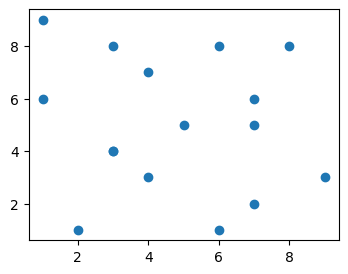

In [7]:
import matplotlib.pyplot as plt

x = [6,7,8,7,2,1,9,4,3,6,1,3,4,5,7,3]
y = [1,5,8,2,1,6,3,7,4,8,9,4,3,5,6,8]
plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

**Figure 1:** Scatter plot with random 2D coordinates to explain KD Tree 

In a two-dimensional space, this would mean that we would first divide the scatter plot in the middle along the vertical. The division is always done by a "division point" (already existing point of the training dataset), which means that points to the right belong to one subgroup, and those on the left belong to the other. Then we divide the two subgroups into two again, but now using the x-axis. Subgroups contain an approximately equal number of datapoints (Fig. 2).

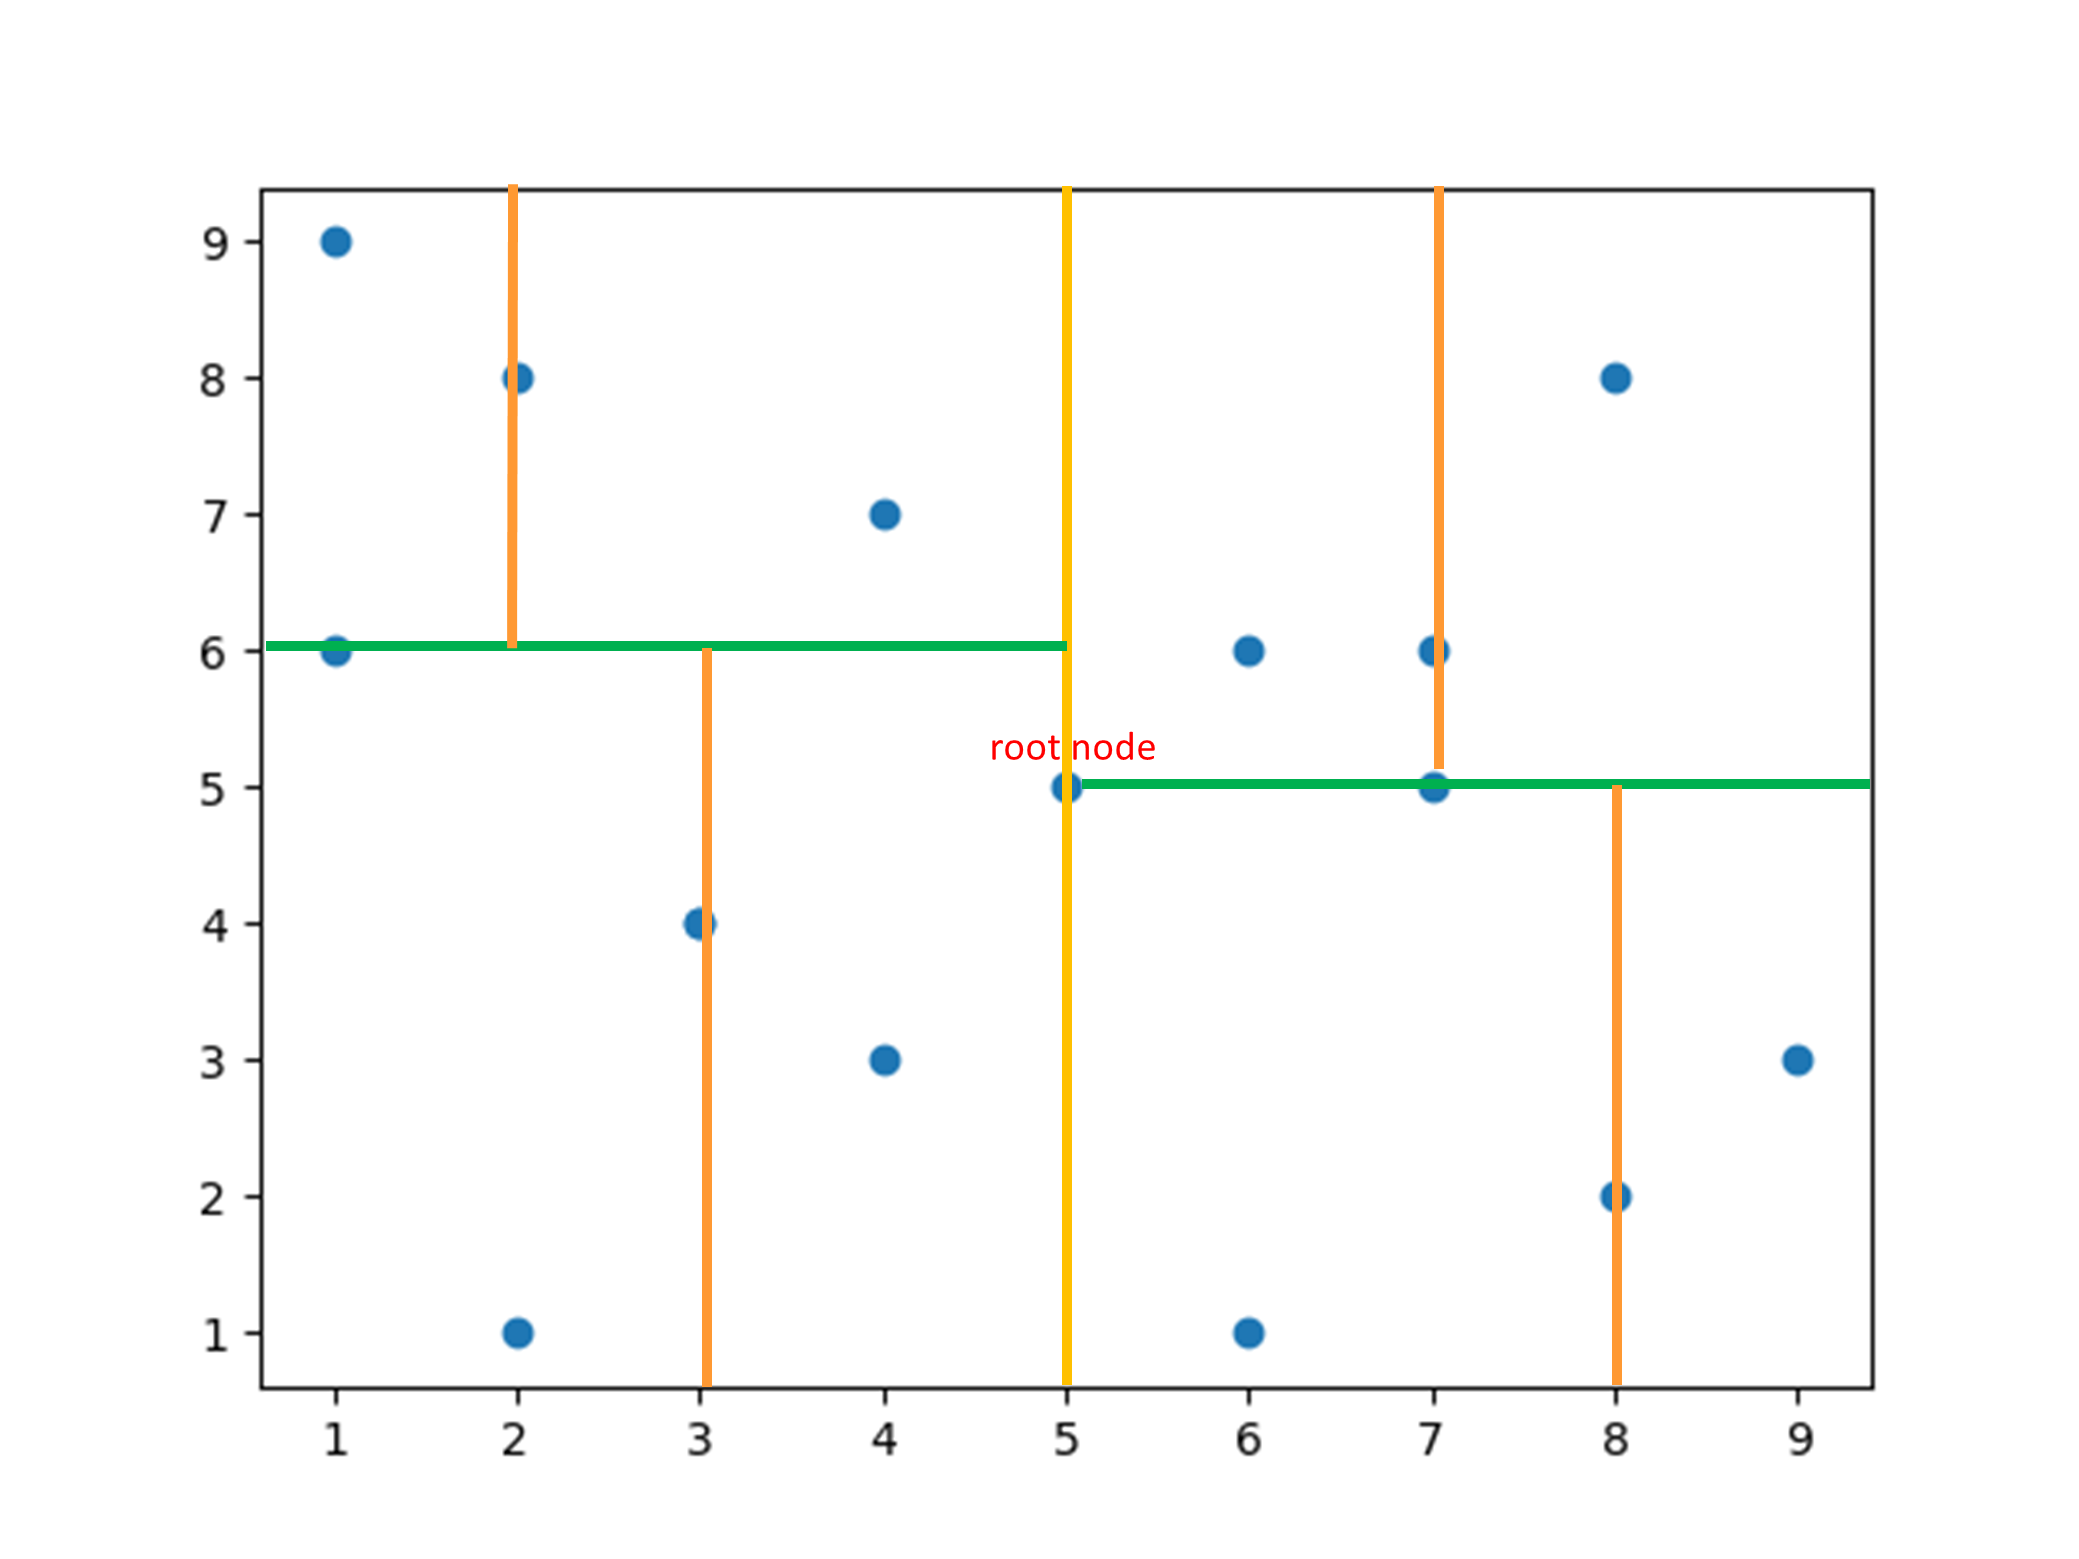

In [20]:
from IPython.display import Image, display
display (Image('Figures Report/Figure_2.png', width='40%'))

**Figure 2:** Division of our scatter plot from figure 1 into subgroups to illustrate KD Tree

The division of the data set is done until the leafsize is reached, which measures minimal datapoints a subgroup needs for division (Haran, 2022).   
The first division point we used is now our "root node". From the root node two new division points emerge, one division point is within the area to the left of the root node and the other is in the area to the right. The result is a tree diagram in which two paths emerge from each division point (Fig. 3).

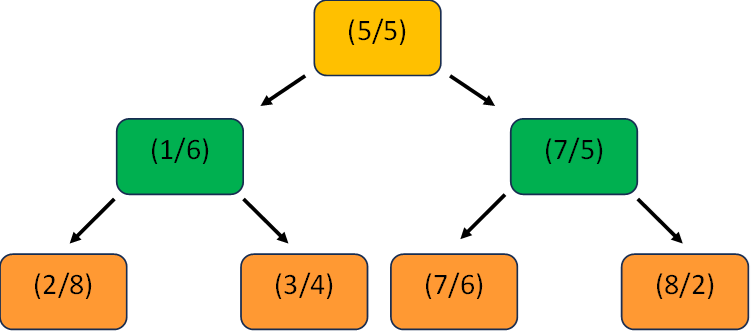

In [10]:
display (Image('Figures Report/KD_tree.png',width='30%'))

**Figure 3:** Tree diagram of the scatter plot from figure 1 after the division into subgroups in figure 2 

If we now place a test point in the n-dimensional space, we start by comparing the coordinates of the point with the root node. Assuming the point is to the left of the root node, we walk down the path to the second division point on the left. The test point is compared a second time and the algorithm again selects the division point whose Euclidean distance is closer to our test point. This is done until we reach the end point of the tree (Haran, 2022). 
Since we cannot assume that the endpoint of the tree is the nearest neighbor, we end up going back the path on the tree and eliminate all other possibilities by calculating the distance.
In the end, the algorithm saves the distance calculation between test data point and the training data points that are too far away from the test data point, which makes the algorithm deliver the predictions faster than our KNN (Haran, 2022). 

## KNeighborsClassifier
This function is another way to replace our KNN. The function automatically decides which algorithm to use for calculating the nearest neighbors (unless you change the parameters to a preferred calculation type). There are the following calculation options: "BallTree", "KD-Tree" and "brute" (scikit-learn). Brute force is calculated in the same way as our KNN, i.e. all data points are considered. "Ball Tree" works similar to KD Tree, but with Ball Tree the dataset is divided by a circle (2D) or a sphere (3D). The end result is a tree diagram, where the root node is the starting sphere/circle and starting from the root node two paths lead to the subgroups (Hucker, 2020). If the function is set to automatic, it decides on the basis of the data set which calculation of the nearest neighbors is most efficient (scikit-learn). 
## Confusion matrix
Two-dimensional confusion matrix summarizes the classification results by comparing predicted labels to actual values. Confusion matrix consists of four main rates: true positive (TP), true negative (TN), false positive (FP) and false negative (FN).
Based on confusion matrix different evaluation metrics such as accuracy, recall, F-1 score, and precision can be calculated. 
Accuracy is a metric that measures the overall performance of a classifier and determines the ratio of correctly classified cases to the total number of cases. A higher accuracy value indicates better classification quality by balanced data. If the data is imbalanced the accuracy can be misleading. 
Recall measures how many positive cases have been correctly identified. A higher recall value indicates a greater ability of the classifier to detect positive cases.
Precision measures how accurate the classification of positive cases is and how many of the identified positive cases are actually correct. A higher precision value indicates that fewer cases are misclassified as positive.
F1-score is often described as the average of precision and recall. F1- score works also well on imbalanced datasets.
Additionally macro and weighted averages can be calculated. Macro averages calculates an average value for each class separately giving each class equal weight, whereas weighted averages take into consideration imbalanced data and its influence (Kanstrén, T., 2020). Formulas for confusion matrix can be found in the appendix.
## CNN 
A Convolutional Neural Network (CNN) is a deep learning model designed for visual data processing. Inspired by the human visual system, CNNs capture spatial relationships and extract meaningful features from images. They have layers for convolution, pooling, and fully connected operations, enabling them to learn hierarchical representations. CNNs automatically detect patterns, objects, and structures in images, and are widely used in tasks like image classification and object detection (LeCun et al., 2015). 

# Results
## Runtime of KNN, KD-Tree and KNeighborsClassifier
To find out how fast the algorithms are with a pc-value of 330 and k=4, we used the time() function. We first measured the runtime for _Lenovo Ideapad 5-15ITL05_ with Intel® Core™ i5 processor and 16GB RAM and then for _Apple MacBook Pro14_ with Apple M1 Max processor and 64GB RAM. For our KNN, we measured the time for the first five test datapoints. We then averaged the five times to get the approximate time per test datapoint. For KD-Trees, we calculated how long it takes the algorithm to make predictions for all test datapoints. We then divided this time by 10000 to get the approximate time per frame. For the classifier we did the same, but we measured the runtime for one batch at a time. In our code, one batch has a size of 200. We measured this five times, calculated the average value and divided the average value by 200. 
We have summarized the results in the following table:

**Table 1:** Runtime of KNN, KD-Tree and KNeighborsClassifier with M1 Max and Intel® Core™ i5 processor

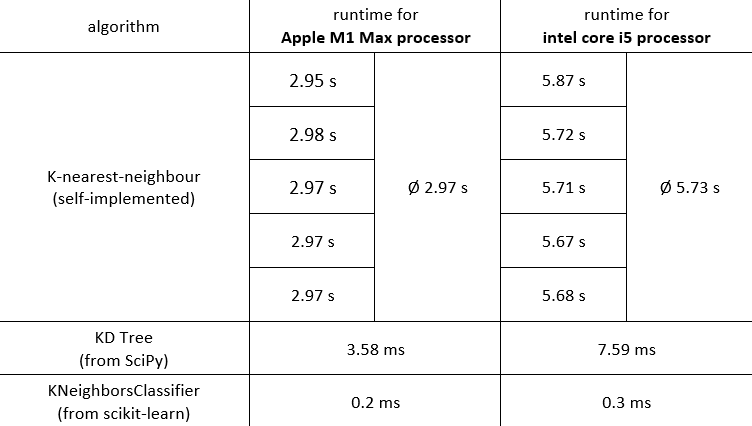

In [22]:
display (Image('Figures Report/Table_1.png',width='40%'))

It can be seen that especially for our KNN, the runtime of the _Macbook Pro14_ is significantly faster than the runtime of the _Lenovo Ideapad 5 laptop_. This is also the case for KD-Tree. For the KNeighboursClassifier, only a minimal difference of 0.1 ms can be seen. 
Furthermore, you can see that the runtime fluctuates by ±0.19 ms for the Lenovo Ideapad 5 for the first five test datapoints. The fluctuations are only ±0.03 ms for the MacBook Pro14.
## Accuracy of KNN, KD-Tree and KNeighborsClassifier
We have determined the accuracy of the three algorithms KNN, KD-Tree and KNeighborsClassifier. The result can be seen in Figure 4 for the k-values 2-10.

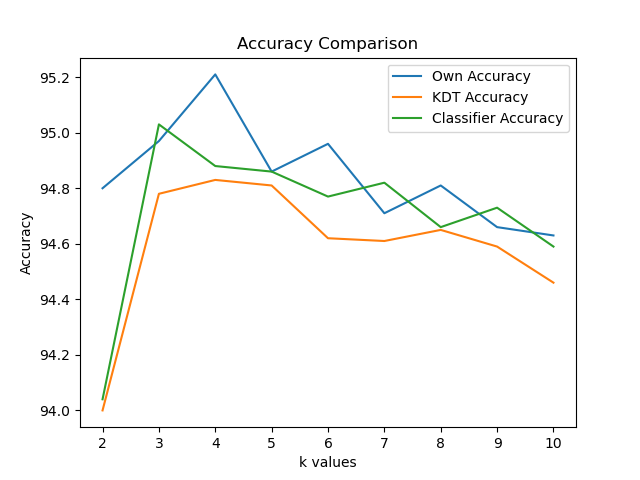

In [23]:
display (Image('Figures Report/plot_accuracies.png',width='40%'))

**Figure 4:** Accuracies of KNN, KD-Tree and KNeighborsClassifier for k=2-10

The Accuracies are different for each algorithm. For the classifier (green), the best accuracy is at k=3. For our KNN (blue) and the KD tree (orange), the best accuracy is reached at k=4. Additionally, the accuracy is highest for our KNN.
## Principal components and their explained variance 
We can observe that correlations of the data set are not well captured at least for the first few dimensions. This is because the first five components only explain a combined variance of the data set of 20%. Overall, the first 10 components individually explain very little variance in the dataset. (Appendix, Fig. 2)

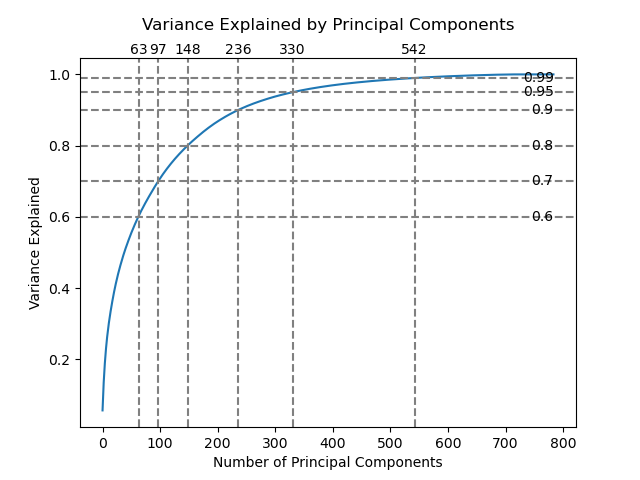

In [24]:
display (Image('Figures Report/cumulativ_variance_for_PCs.png',width='40%'))

**Figure 5:** Cumulative Explained Variance of the train data set for differing numbers of principal components

To explain a cumulative 60% of the variance of the train data set, 63 principal components are necessary. The value for the number of principal components that must be used to explain the variance of the dataset then increases to 330 at 95% (Fig 5). However, with a loss of 5% of information, we can reduce the number of principal components by 454 from originally 784 dimensions.  
## Accuracy and execution time for differing numbers of Principal components
Since the accuracies calculated by the KNeighborsClassifier function and those calculated by our algorithm do not differ significantly, we used the former to calculate the accuracy of the algorithm with different numbers of principal components. We can see that the accuracy for the first principal components increases sharply and reaches a maximum at 75 components. This results in an accuracy of 95.67%. After that, however, the accuracy surprisingly drops to 94.83% for 300 principal components and remains the same for up to 784 components (Fig. 6). 

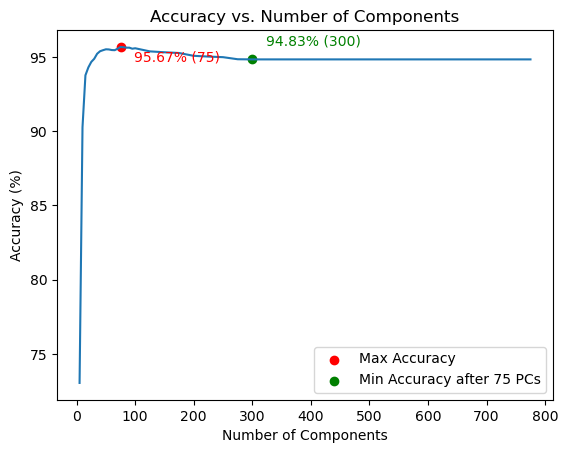

In [25]:
display (Image('Figures Report/acuracy_No_PCs.png',width='40%'))

**Figure 6:** Accuracy calculated by KNeighborsClassifier from the scikit-learn library for different numbers of principal components

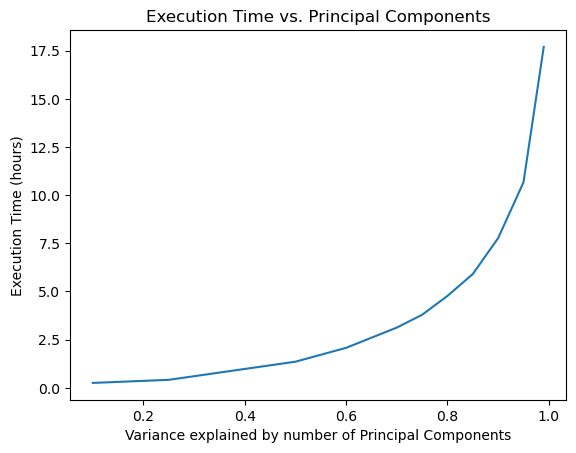

In [26]:
display (Image('Figures Report/execution_time_PCs.png',width='40%'))

**Figure 7:** Execution time of our algorithm for different values of cumulative explained variance of the test dataset

Execution times for different numbers of principal components were measured on an M1 MacBook Air 2020 with 8 GB Computer memory. The average calculation time for different PC values on our KNN algorithm was run for 50 images each. This was then averaged and multiplied by the number of test data images to get an estimate of the execution time for all test images of the dataset at different PC values. 
If we compare the execution time of our algorithm with the number of principal components, we first see a moderate increase in the execution time as the number of PCs increases. For a cumulative explained variance of 20% (6 principal components), only 0.26 hours are needed (Fig. 3). However, the accuracy also drops significantly to 64.98%. To explain a cumulative variance of 64% (75 principal components), we need an execution time of 2.3 hours and achieve an accuracy of 95.89%. There is a much steeper increase if we want to explain 70% or more variance, then the number of principal components also increases sharply and there are significantly higher times to execute the algorithm. For example, in order to calculate the accuracy for different K-values at 95% cumulative explained variance an execution time of roughly 9 hours was required (Fig. 7). 
## Comparison: our KNN algorithm and Convolutional Neural Network (CNN) 
If we run our data set on a Convolutional Neural Network for 10 epochs, we get a validation accuracy of about 99.08%. This is even more than the already high accuracy of our KNN algorithm. For K=4 and 75 principal components we achieve an accuracy of 95.89% on our KNN classifier. 
## Error analysis
### dataset support
At the beginning of the error analysis, it is important to check the support of the dataset which means, if the dataset is balanced or not. This influences the method of calculating the macro average.

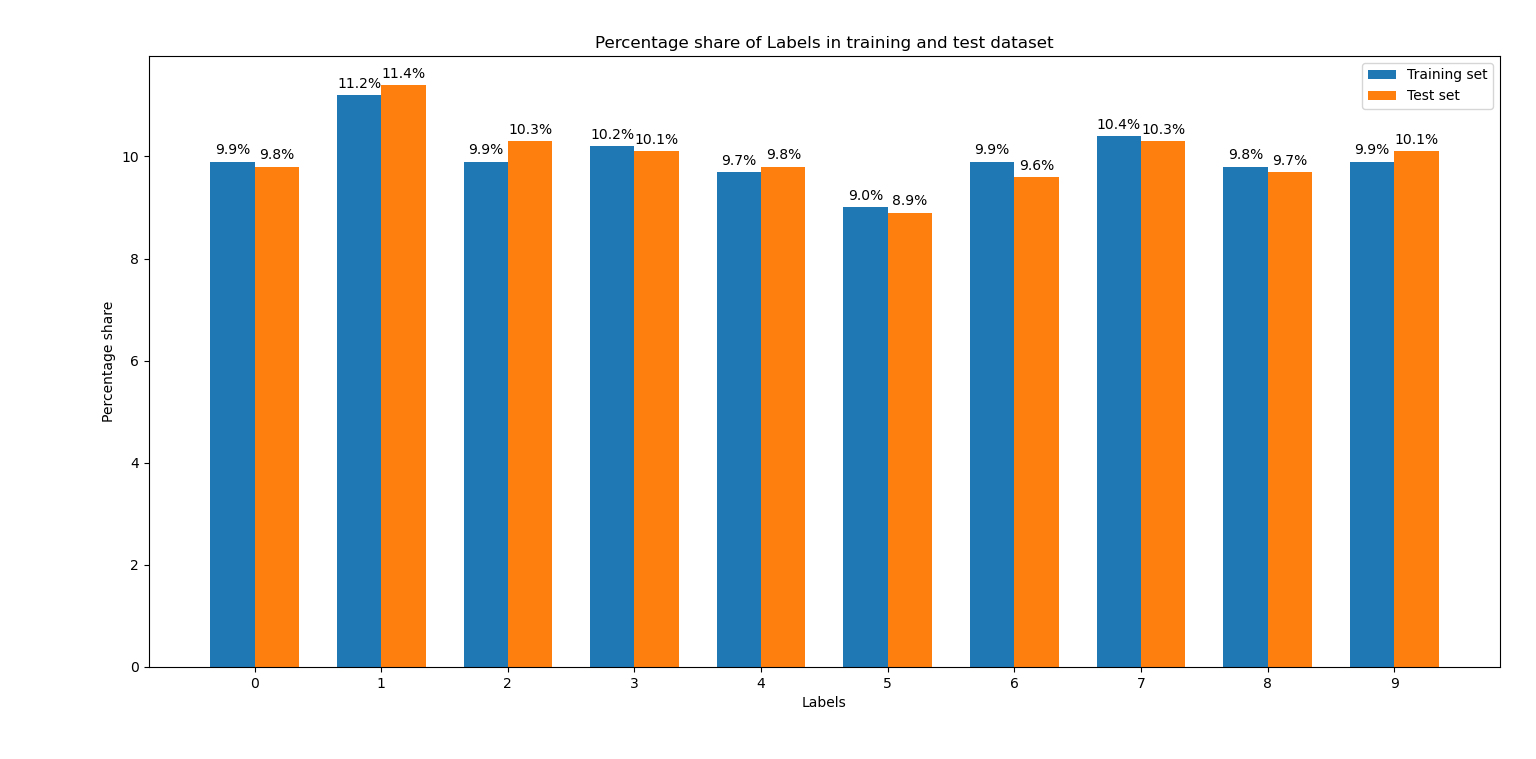

In [28]:
display (Image('Figures Report/Figure_10.png', width='70%'))

**Figure 8:** Relative share of each label in training- and testdataset

It can be noticed that the data only deviate by +/- 0.4%. Based on this plot, we come to the conclusion that the data sets are balanced.
### Our KNN code
The best accuracy we have achieved for our KNN code analysis was for k=4 and variance=0.64, which equals 95.89%. Figure 9 shown below shows exact classification result for each class.

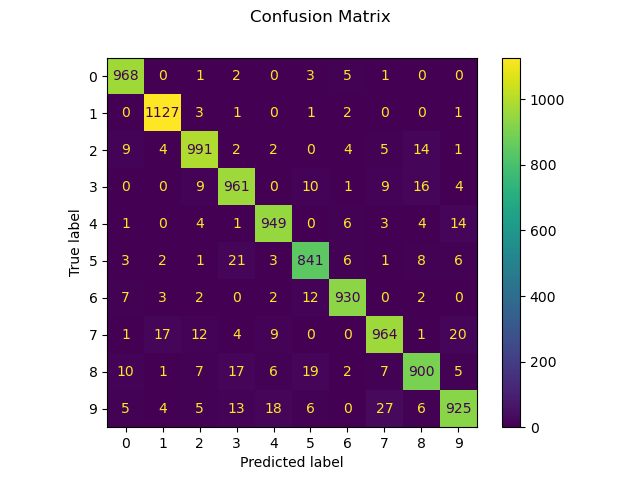

In [29]:
display (Image('Figures Report/confusion matrix for k=4 for our code.png',width='40%' ))

**Figure 9:** Confusion matrix for the classification using our KNN algorithm

Shown in the Table 3 the classification report indicates a specifically high accuracy for digit classes 0, 1 and 6, which tells the good performance of assigning the digits to the correct label class. Our KNN code had problems recognising digit class 9, achieving the lowest score, which tells us that there is a room for improvement of this algorithm. 
Both the macro average and weighted average metrics also have high scores of 0.96 for precision, recall, and F1-score. These average metrics provide an overall assessment of the model's performance across all classes, considering both class-specific performance and potential class imbalances. Since macro and weighted averages are equal, we can be assured that the data is balanced.

**Table 2:** Classification report for our KNN algorithm

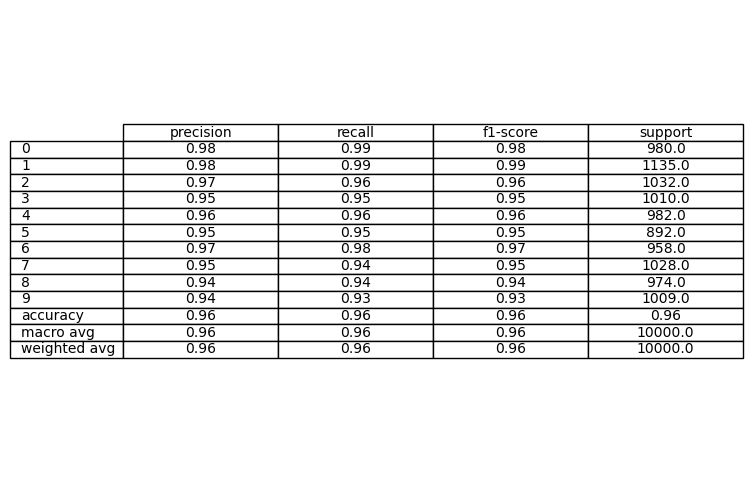

In [18]:
display (Image('Figures Report/classification_report_our_KNN.png',width='50%'))

Overall, our KNN code performs accurately classifying digits to their own digit class, achieving a high accuracy rate. Further development and improvement of this code could potentially optimize the accuracy of the digit classes with lower scores and serve generally better accuracy score of the whole algorithm. 

# Discussion
## Runtime
The runtime is faster for KD-Tree than for our KNN because KD-Tree restricts the nearest neighbor search space and therefore not all 60000 training data points are compared to the test datapoint (Haran, 2022). KNeighborsClassifier is the fastest of the three algorithms and the explanations for this are as follows: First, the classifier automatically decides which parameters to choose to get the fastest and most accurate computation (scikit-learn). Another assumption would be that The KNeighborsClassifier uses optimized libraries in the background to perform calculations efficiently. These libraries could be written in C or C++, which would speed up the computation (Thattil, 2021). Ultimately, it could also be that nearest neighbor searches run on multiple CPU cores, which would increase computing power (Geissler, 2019). 
The _Macbook 14Pro_ is significantly faster than the _Lenovo Ideapad 5-15ITL05_ because the Apple M1 Pro processor is more powerful than the Intel® Core™ i5 processor (Kasperek et al., 2022). The structure of the Apple processor, especially the cache system, is responsible for the performance strength of this processor (Ernst, 2021). The Intel® Core™ i5 processor is slower than the Apple M1 Pro processor, but the accuracy remains the same (Kasperek et al., 2022).
## Accuracies
Normally, one would expect the accuracies to remain the same regardless of the algorithm. Nevertheless, there are minimal deviations that can be explained as follows. First, the rounding of the euclidean distance could be different in the three algorithms. We cannot track to which decimal place those are rounded. If the rounding is different, it can lead to a change in the list of most common neighbors and thus to different predictions. Another explanation could be that if there are several equal euclidean distances, that each algorithm decides differently which neighbor comes into the most common neighbor list. When calculating the accuracy for even k-values, it can happen that two labels appear equally often in the list of the most common labels. If this is the case, the algorithm chooses the label, which is in the first line of the most common neighbors list (Yuvaraaj). It may be that the KD-tree of SciPy and the KNeighboursClassifier have a different selection process in this case.
## Best k-value
The best k-value for our KNN algorithm is 4. This value is surprisingly small considering that we have a total of 60,000 training images. The reason for this is that the data are all relatively close together and the euclidean distances have a small deviation. This assumption could be proven true by viewing our euclidean distances (list is stored in our repository).
## PCA, accuracy and execution time
Surprisingly, decreasing the number of principal components in KNN algorithm, increases our accuracy as can be seen in Fig. 6. The dimensionality reduction performed using PCA can help alleviate the curse of dimensionality, a phenomenon that occurs when working with high-dimensional data. In high-dimensional spaces, data becomes sparse, and the volume of the space grows exponentially. This sparsity makes it difficult to find meaningful patterns and relationships, leading to issues such as increased computational complexity and unreliable similarity measures (Grant, 2019). The K-Nearest Neighbors algorithm is based on the assumption that a given data point can be assigned to a class of data points based on closer distance compared to other data points of a data set. However, as the dimensions increase, the measured distances of the train data point to the test data points increases dramatically and it becomes more difficult to distinguish KNN and other data points within the training set based on closer distances. 
To overcome the curse of dimensionality techniques to reduce dimensionality, such as PCA are necessary. For our algorithm we employed PCA. We can assume that this in turn improved the performance of out machine learning algorithms on high-dimensional MNIST dataset (Meigarom, 2017).  
Furthermore, we can observe that the culminated variance achieved by the principal components and the time our algorithm needs to be executed are inversely correlated. More principal components lead to higher execution times, but also a stronger explanation of the variance, hence less information loss. The increase in execution time is due to the number of distance measurements required. For our calculations we have mostly assumed a target value of 95% cumulative explained variance (330 principal components). With a K-value of 4, we thus achieved an accuracy of 95.21% and had an execution time of roughly 9 hours. In comparison, a cumulative explained variance of 0.64, respectively 75 PCs, leads to a significant lower execution time of 2.3 hours, but also to an increase in accuracy to 95.89% in comparison. We can conclude that dimension reduction is not only an important step to significantly increase efficiency but can also increase accuracy.  
## CNN vs. KNN
CNNs generally achieve higher accuracy compared to KNN, although statistical tests are needed for conclusive significance. CNNs excel due to their hierarchical local feature extraction through convolutional layers. They automatically learn and recognize important features like edges, textures, and shapes, crucial for distinguishing classes in images. KNN lacks this feature extraction capability and cannot optimize its performance through end-to-end learning like CNNs (Alzubaidi et al., 2021).
## Error analysis of our KNN algorithm
Presented in the Figure 9 confusion matrix helps us draw some conclusions about the KNN algorithm that we used. As expected, the values which are presented on the diagonals are the most common elements of the matrix. That means that the majority of labels were assigned correctly to their respective labels. Not surprising is also the accuracy which equals 95.89%. Regarding misclassifications there are instances where the KNN algorithm struggled. This can be seen in the case of confusing digit 5 with digit 3 or digit 1 and digit 7. This could be easily explained by the visual similarity of those digit, leading to the misclassification. 
Provided in the Table 2 classification report presents precision, recall, F-1 score and support which sums up the overall performance of KNN algorithm. The precision values presented in the Table 2 range from 0.94 to 0.98, which indicate a high accuracy of positive predictions for each digit class. Also, the recall which ranges from 0.93 to 0.99 approves the majority of positive examples for each class. Since the F-1 score indicates a balanced performance of the model and takes into consideration both precision and recall, we can clearly see that the performance of the KNN algorithm is certainly balanced and ranges between 0.93 and 0.99. Both Figure 8 and support values in Table 2 indicate that the data is balanced, which also helps us understand more the distribution of the data. As a result of the fact that our data is balanced, we can clearly see that the accuracy values as well as macro and weighted averages are equal.   
Overall, our KNN algorithm achieves a high accuracy and low misclassification rate in classifying digits to their classes. This was highly expected due to the fact that KNN algorithm is a flexible and versatile algorithm which can adapt to the outliers and data that can be falsely interpreted.
# Conclusion
We used one data set to train our KNN algorithm (train data set) and one to determine the performance of our data set (test data set). Based on the accuracy values, we then adjusted parameters (K-value, PCs) to improve the accuracy. In K-fold cross validation, the dataset is split into test and training datasets in k iterations. The performance is calculated as the average of these iterations (Bose, 2019). 
This would have been a much more robust method of model validation that prevents overfitting, i.e. fitting the model too closely to specifications of a particular data set. It would have also been better to split the data set again so that we adjust specific parameters of the algorithm with a validation data set and then perform the performance analysis only on the unseen, new data of a previously unused test set to evaluate our classifier for new, unseen data. 
However, it should also be taken into account that our data set is relatively large with 60,000 training images and 10,000 test images and that the number of digits in both data sets are relatively balanced.   
# References 
Alzubaidi, L., Zhang, J., Humaidi, A.J., Al-Dujaili, A., Duan, Y., Al-Shamma, O., Santamaría, J., Fadhel, M.A., Al-Amidie, M., and Farhan, L. (2021). Review of deep learning: concepts, CNN architectures, challenges, applications, future directions. J Big Data 8, 53. 10.1186/s40537-021-00444-8.

Bose, A. (2019). Cross Validation — Why & How. https://towardsdatascience.com/cross-validation-430d9a5fee22. accessed on: 14.07.2023

Bro, R., and Smilde, A.K. (2014). Principal component analysis. Analytical Methods 6, 2812-2831. 10.1039/C3AY41907J.

Ernst, N. (2021). Formel M1: Warum der Apple-Chip so schnell ist. heise online.

GeeksForGeeks (2023). Python Pandas DataFrame. https://www.geeksforgeeks.org/python-pandas-dataframe/. accessed on: 07.07.2023

Geißler, O. (2019). Was ist ein Rechenkern (Core)? https://www.datacenter-insider.de/was-ist-ein-rechenkern-core-a-820808/. accessed on: 13.07.2023

Grant, P. (2019). k-Nearest Neighbors and the Curse of Dimensionality. https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d. accessed on: 11.07.2023

Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media, Inc.

Grotz, B. numpy – eine Bibliothek für numerische Berechnungen. https://www.grund-wissen.de/informatik/python/scipy/numpy.html. accessed on: 07.07.2023

Haran, B. (2022). K-d Trees - Computerphile. https://www.youtube.com/watch?v=BK5x7IUTIyU. accessed on: 11.07.2023

Hucker, M. (2020). Tree algorithms explained: Ball Tree Algorithm vs. KD Tree vs. Brute Force.

Kanstrén, T. (2020). A Look at Precision, Recall, and F1-Score. https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec. accessed on: 11.07.2023

Kasperek, D., Podpora, M., and Kawala-Sterniuk, A. (2022). Comparison of the Usability of Apple M1 Processors for Various Machine Learning Tasks. Sensors 22, 8005.

Klein, B. NumPy Tutorial. https://www.python-kurs.eu/numpy.php. accessed on: 07.07.2023

LeCun, Y., Bengio, Y., and Hinton, G. (2015). Deep learning. Nature 521, 436-444. 10.1038/nature14539.

LeCun, Y., Cortes, C., and Burges, C.J.C. (2010). MNIST handwritten digit database. http://yann.lecun.com/exdb/mnist/. accessed on: 15.07.2023

Meigarom (2017). Dimensionality Reduction — Does PCA really improve classification outcome? https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32. accessed on: 12.07.2023

scikit-learn. sklearn.neighbors.KDTree. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html. accessed on: 13.07.2023

scikit-learn. sklearn.neighbors.KNeighborsClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. accessed on: 13.07.2023

Taunk, K., De, S., Verma, S., and Swetapadma, A. (2019). A Brief Review of Nearest Neighbor Algorithm for Learning and Classification.

Thattil, S. (2021). Vor- und Nachteile der Programmiersprache C++. https://www.software-developer-india.com/de/vor-und-nachteile-der-programmiersprache-c/. accessed on: 14.07.2023

The-Matplotlib-development-team. Matplotlib: Visualization with Python. https://matplotlib.org/. accessed on: 07.07.2023

Trevor, H., Robert, T., and Jerome, F. (2009). The Elements of Statistical Learning : Data Mining, Inference, and Prediction, 2 Edition. (New York: Springer).

Yuvaraaj, M. Exploring The Brute Force K-Nearest Neighbors Algorithm. https://www.kdnuggets.com/2020/10/exploring-brute-force-nearest-neighbors-algorithm.html. accessed on: 14.07.2023


# Appendix

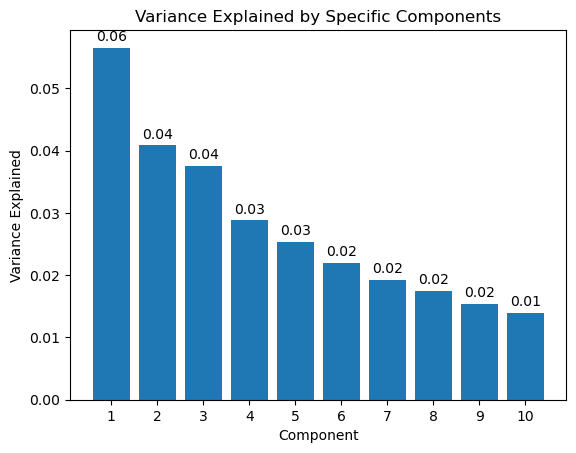

In [9]:
display (Image('Figures Report/variance_by_each_PC.png'))

**Figure 10:** Explained variance for each individual principal component

Formulas confusion matrix:

$$ Accuracy=  {TP+TN\over TP+TN+FP+FN}$$ 

$$ Recall=  {TP \over TP+FN}$$

$$ Precision=  {TP\over TP+FP}$$

$$ F1=2 ×  {Precision × Recall\over Precision+Recall}$$